# Pattern Matching

## Part 1: Handling strings and basic python operations

In this first task of the lab we are required to load in basic data types and complete some manipulation tasks on them. Specifically we will be working with strings and slicing then changing them into floats and performing mathematical operations on them.

In [2]:

statement = "The value of pi is approximately 333 divided by 106" #given statement from lab script

numerator = float(statement[32:36]) #extracting the numerator and denominator from the statement by slicing the string and converting to float
denominator = float(statement[47:51])

pi = numerator/denominator #calculating pi

print(f'The approximate value of pi obtained by dividing 333 by 106 is {pi}')


The approximate value of pi obtained by dividing 333 by 106 is 3.141509433962264


## Part 2 loading and manipulating image files

In this task a file containing a 2D array of pixel values is loaded in and manipulated. The array is then converted into an image and displayed.

The shape of the image is (338, 600, 3)
The RGB values for the pixel in the top left are, [0.         0.22352941 0.39607844]


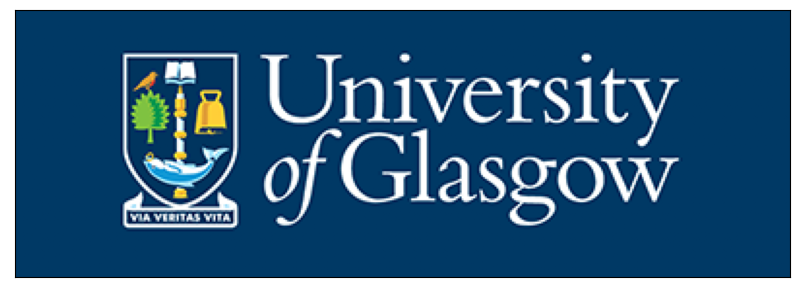

In [3]:
import matplotlib.pyplot as plt #importing the plotting library matplotlib

rgb_img = plt.imread("patterns/glasgow_rgb.png") #reading in the image
rgb_val = (rgb_img[0,0]) #extracting the rgb values for the top left pixel


print("The shape of the image is", rgb_img.shape)
print(f"The RGB values for the pixel in the top left are, {rgb_val}")

#plotting the image
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)
plt.ylim(238,100)   #setting the limits of the y axis to crop the image by 100 pixels from the top and bottom
plt.xlim(100,500)   #setting the limits of the x axis to crop the image by 100 pixels from the left and right
plt.xticks([])    #removing the x and y ticks
plt.yticks([])
plt.show()


## Hidden Instructions

In this task there are 20 images provided half of which have the naming convention hidden_xxxx.png and the othere yyy_hidden_xxxx.png and they are to be sorted into two folders. This was completed using the os and re libraries. The aim of this task was to then compile each group of images into 2 seperate images and find the difference of these images. This should then reveal a message hidden within the images.


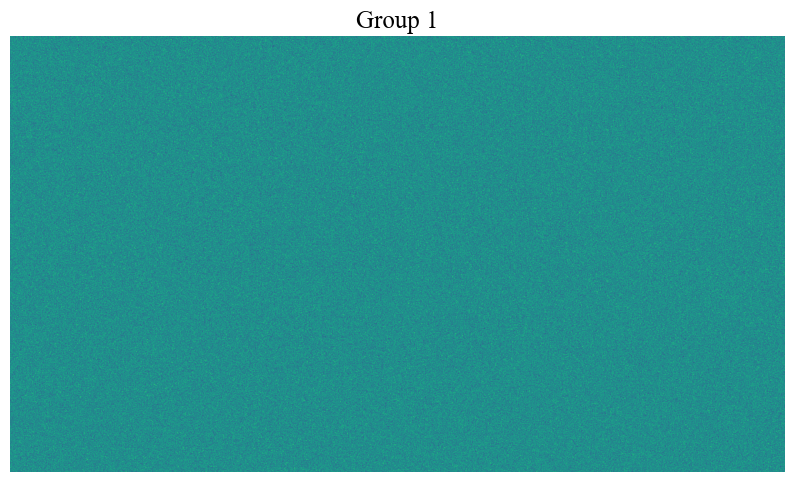

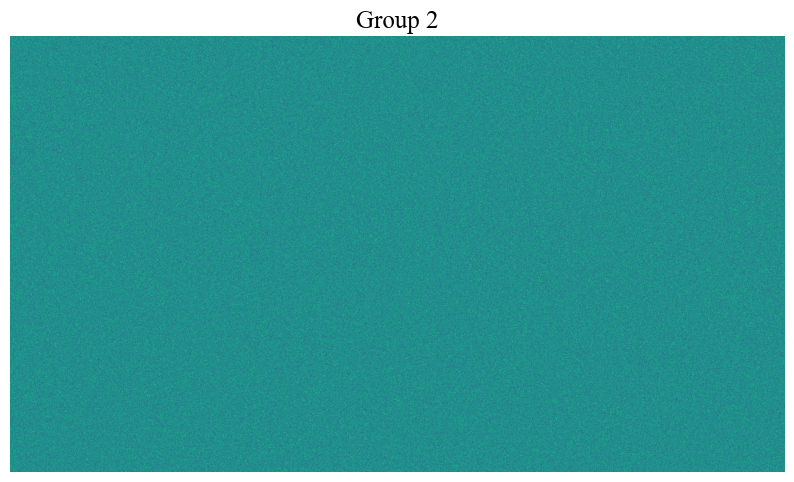

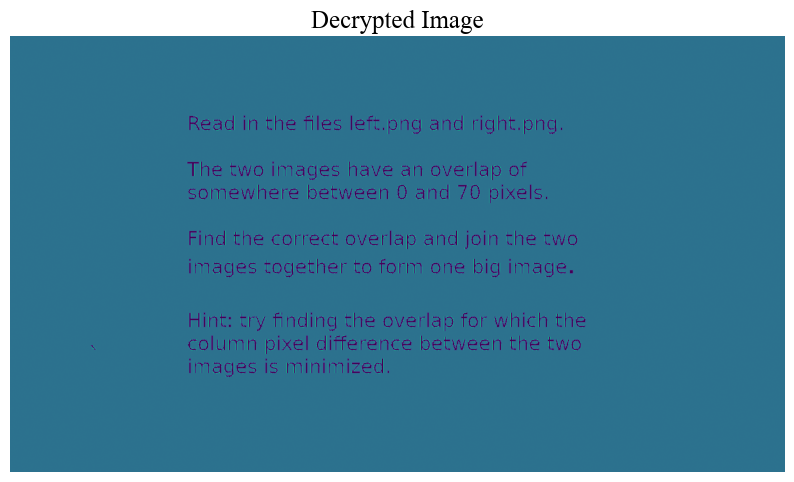

In [13]:
import re
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('../report.mplstyle') #importing the style sheet

path = "patterns/"  #define a path to the patterns folder

files = os.listdir("patterns/") #list all the files in the patterns folder

for file in files: #sort all the files starting with hidden into group_1
    if file.startswith("hidden"):
        print(file)
        os.rename(path+file, path+'group_1/'+file)

for file in files: #sort all the files containing hidden into group_2
    if re.search("hidden", file):
        print(file)
        os.rename("patterns/"+file, path+"group_2/"+file)


group_1 = os.listdir(path+"group_1/")
group_2 = os.listdir(path+"group_2/") #list all the files in the two groups

dic_g1 = {} #create two empty dictionaries to store the images
dic_g2 = {}

for i in np.arange(len(group_1)):  #read in the images and store them in the dictionaries with associated keys
    dic_g1[group_1[i]] = plt.imread(path+"group_1/"+group_1[i])

for i in np.arange(len(group_2)):
    dic_g2[group_2[i]] = plt.imread(path+"group_2/"+group_2[i])

img_g1 = (np.zeros((1080,1920))) #create two empty arrays to store the images
img_g2 = (np.zeros((1080,1920)))

for i in np.arange(len(dic_g1)): #add the images together to create a single image
    img_g1 = dic_g1[group_1[i]]+img_g1
    
for i in np.arange(len(dic_g2)):
    img_g2 = dic_g2[group_2[i]]+img_g2

plt.figure(figsize=(10,10)) #plot the two seperate images
plt.imshow(img_g1)
plt.axis('off')
plt.title('Group 1')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(img_g2)
plt.axis('off')
plt.title('Group 2')
plt.show()

decrypt_img = img_g1-img_g2 #subtract the two images to decrypt the hidden image

plt.figure(figsize=(10,10))  #plot the decrypted image
plt.imshow(decrypt_img)
plt.axis('off')
plt.title('Decrypted Image')
plt.show()


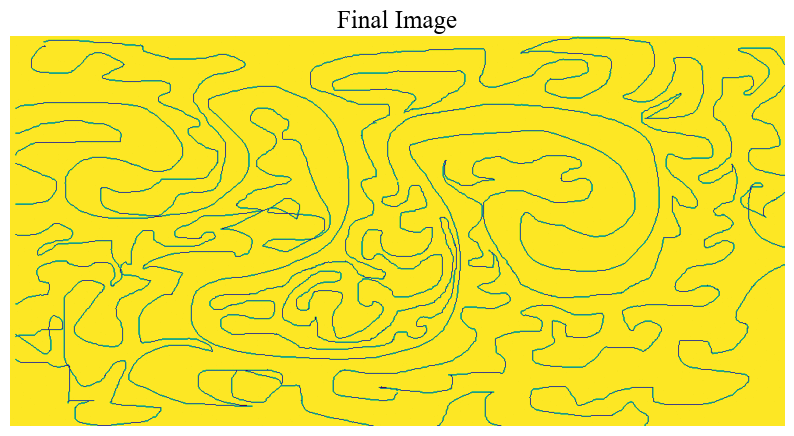

In [14]:
image_1 = (plt.imread('patterns/left.png'))
image_2 = (plt.imread('patterns/right.png'))   #Read in the two images and save them as a variable

def difference(left, right):  #define a function for the difference of two arrays 
    diffren = left - right
    return  abs(sum(diffren)) 

diffr = []  #create an empty array to store the differences
for i in np.arange(0,70,1):  #loop over the columns of the two images and calculate the difference
    diff = difference(image_1[:,-i],image_2[:,i])
    diffr.append(diff)



left_img = image_1[:,:(image_1.shape[1]-np.argmin(diffr))]   #slice the two images to remove the section that is duplicated
right_img = image_2[:,np.argmin(diffr):]

final_img = np.concatenate((left_img,right_img),axis=1)  #concatenate the two images together to create the final image

plt.figure(figsize=(10,10))  #plot the final image
plt.imshow(final_img)
plt.axis('off')
plt.title('Final Image')
plt.show()


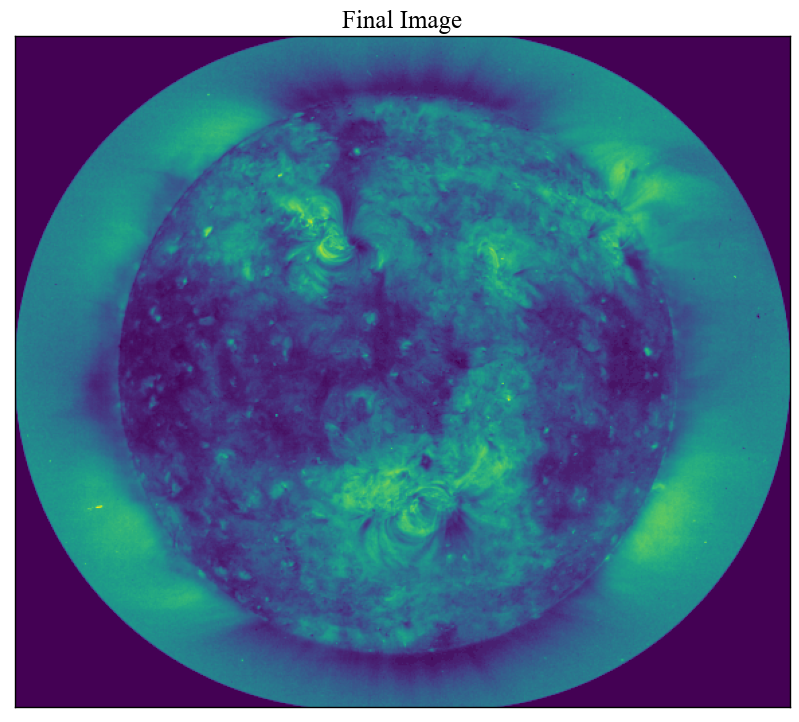

In [21]:
soho_left = plt.imread("patterns/soho_left.png")
soho_right = plt.imread("patterns/soho_right.png")   #Read in the two images and save them as a variable

diffr =[]
for i in np.arange(0,200,1):   #loop over the columns of the two images and calculate the difference in the first image
    for j in np.arange(0,200,1):
        diff = difference(soho_left[:,-i],soho_right[:,j])
        diffr.append(diff)

left_crop = int(np.floor(np.argmin(diffr)/200))  #find the index of the minimum difference and slice the images to remove the duplicated section

diffr =[]
for i in np.arange(0,200,1):
    for j in np.arange(0,200,1): #loop over the columns of the two images and calculate the difference in the second image
        diff = difference(soho_left[:,-j],soho_right[:,i])
        diffr.append(diff)

right_crop = int(np.floor(np.argmin(diffr)/200))

left_img = soho_left[:,:(soho_left.shape[1]-left_crop)]  #slice the two images to remove the section that is duplicated
right_img = soho_right[:,right_crop:]

final_img = np.concatenate((left_img,right_img),axis=1) 

plt.figure(figsize=(10,10))
plt.imshow(final_img)
plt.xticks([])
plt.yticks([])
plt.title('Final Image')
plt.show()
